In [32]:
from pandas import Series
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [33]:
dataset = pd.read_csv('data.csv')

In [34]:
dataset['date'] = pd.to_datetime(dataset['date'],infer_datetime_format=True)
indexed_data = dataset.set_index(['date'])

In [35]:
indexed_data.head()


,salescount
date,
2016-01-02,20
2016-01-03,13
2016-01-04,32
2016-01-05,29
2016-01-06,30


In [36]:
from datetime import datetime
indexed_data.head(5)

,salescount
date,
2016-01-02,20
2016-01-03,13
2016-01-04,32
2016-01-05,29
2016-01-06,30


## Plot graph

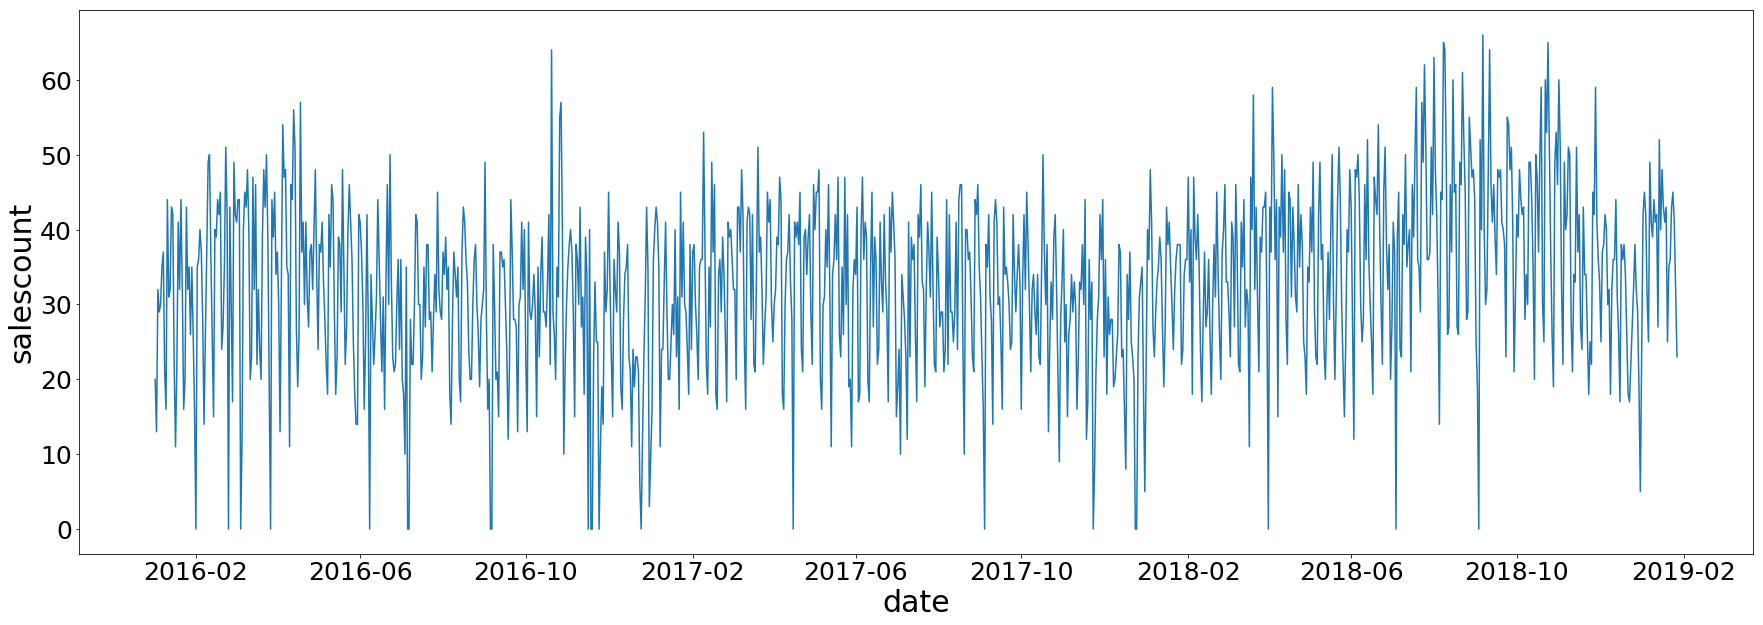

In [37]:
rcParams['figure.figsize'] = 30, 10
plt.xlabel("date",fontsize=30)
plt.ylabel("salescount",fontsize=30)
plt.xticks(fontsize=25)
#plt.xlabel(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(indexed_data)


In [38]:
#decomposition = sm.tsa.seasonal_decompose(indexed_data, model='additive')
#fig = decomposition.plot()
#plt.show()

In [39]:
rol_mean = indexed_data.rolling(window=30).mean()
rol_std = indexed_data.rolling(window=30).std()

In [40]:
print(rol_mean,rol_std)

            salescount
date                  
2016-01-02         NaN
2016-01-03         NaN
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-09         NaN
2016-01-10         NaN
2016-01-11         NaN
2016-01-12         NaN
2016-01-13         NaN
2016-01-14         NaN
2016-01-15         NaN
2016-01-16         NaN
2016-01-17         NaN
2016-01-18         NaN
2016-01-19         NaN
2016-01-20         NaN
2016-01-21         NaN
2016-01-22         NaN
2016-01-23         NaN
2016-01-24         NaN
2016-01-25         NaN
2016-01-26         NaN
2016-01-27         NaN
2016-01-28         NaN
2016-01-29         NaN
2016-01-30         NaN
2016-01-31   29.266667
...                ...
2018-12-28   33.466667
2018-12-29   33.033333
2018-12-30   31.700000
2018-12-31   30.500000
2019-01-02   30.700000
2019-01-03   31.100000
2019-01-04   31.666667
2019-01-05   31.466667
2019-01-06   31.033333
2019-01-07   31.266667
2019-01-08 

## Plot the rolling statistics

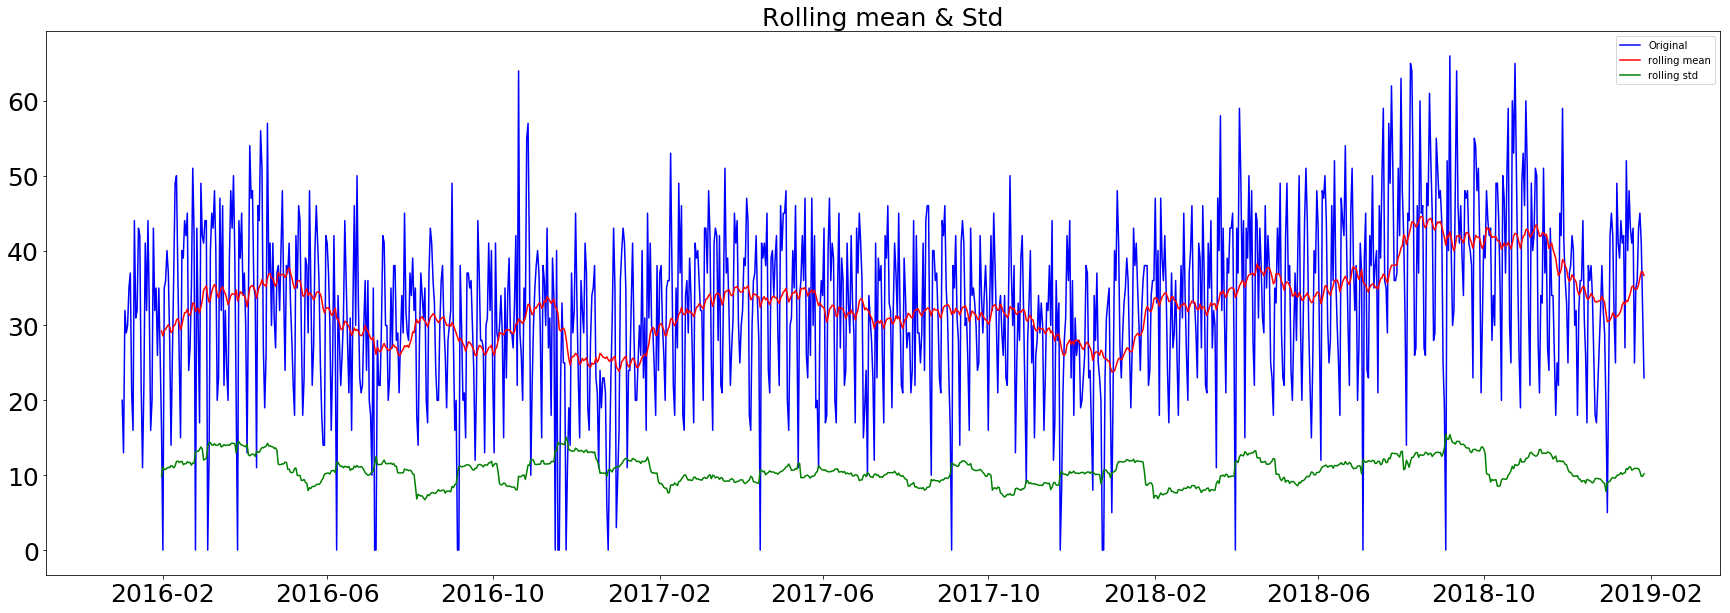

In [41]:
original = plt.plot(indexed_data,color='blue',label='Original')#,fontsize=30)
mean = plt.plot(rol_mean, color ='red', label = 'rolling mean')#,fontsize=30)
std = plt.plot(rol_std, color ='green', label = 'rolling std')#,fontsize=30)
plt.xticks(fontsize=25)
#plt.xlabel(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc='best')
plt.title('Rolling mean & Std',fontsize=25)
plt.show()

## Checking stationarity using Dickey-fuller test

In [42]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-fuller test:")
dftest = adfuller(indexed_data['salescount'],autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-fuller test:
Test Statistic                   -3.218322
p-value                           0.018948
#Lags Used                       20.000000
Number of Observations Used    1095.000000
Critical Value (1%)              -3.436336
Critical Value (5%)              -2.864183
Critical Value (10%)             -2.568177
dtype: float64


 Since p-value is less than 0.05, it is statistically significant that the above time series is stationary

In [43]:
def test_stationarity(indexed_data):
    rol_mean = indexed_data.rolling(window=30).mean()
    rol_std = indexed_data.rolling(window=30).std()
    original = plt.plot(indexed_data,color='blue',label='Original')#,fontsize=30)
    mean = plt.plot(rol_mean, color ='red', label = 'rolling mean')#,fontsize=30)
    std = plt.plot(rol_std, color ='green', label = 'rolling std')#,fontsize=30)
    plt.xticks(fontsize=25)
    #plt.xlabel(fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(loc='best')
    plt.title('Rolling mean & Std',fontsize=25)
    plt.show()
    
    print("Results of Dickey-fuller test:")
    dftest = adfuller(indexed_data['salescount'],autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():

        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

In [44]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

## Transforming by subtracting with rolling mean

In [45]:
data2 = indexed_data-rol_mean
data2.dropna(inplace=True)

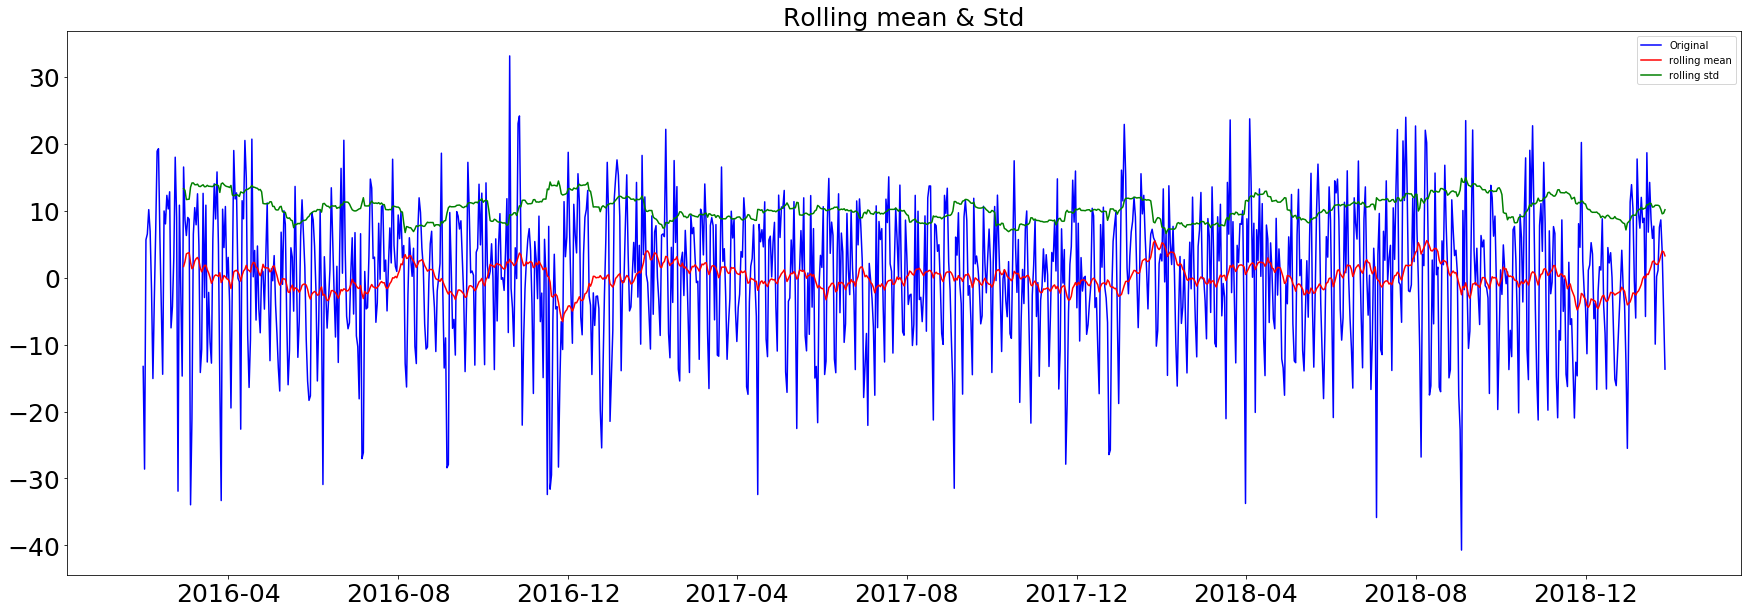

Results of Dickey-fuller test:
Test Statistic                -7.768917e+00
p-value                        9.030493e-12
#Lags Used                     2.200000e+01
Number of Observations Used    1.064000e+03
Critical Value (1%)           -3.436511e+00
Critical Value (5%)           -2.864260e+00
Critical Value (10%)          -2.568218e+00
dtype: float64


In [46]:
test_stationarity(data2)

The p-value of dickey-fuller test is much better than earlier test. Hence timeseries after differencing the moving average is much better than the original data.
Here we can see that the trend and seasonality are removed compared to the previous graph

## Differencing - Shifting the values into timeseries

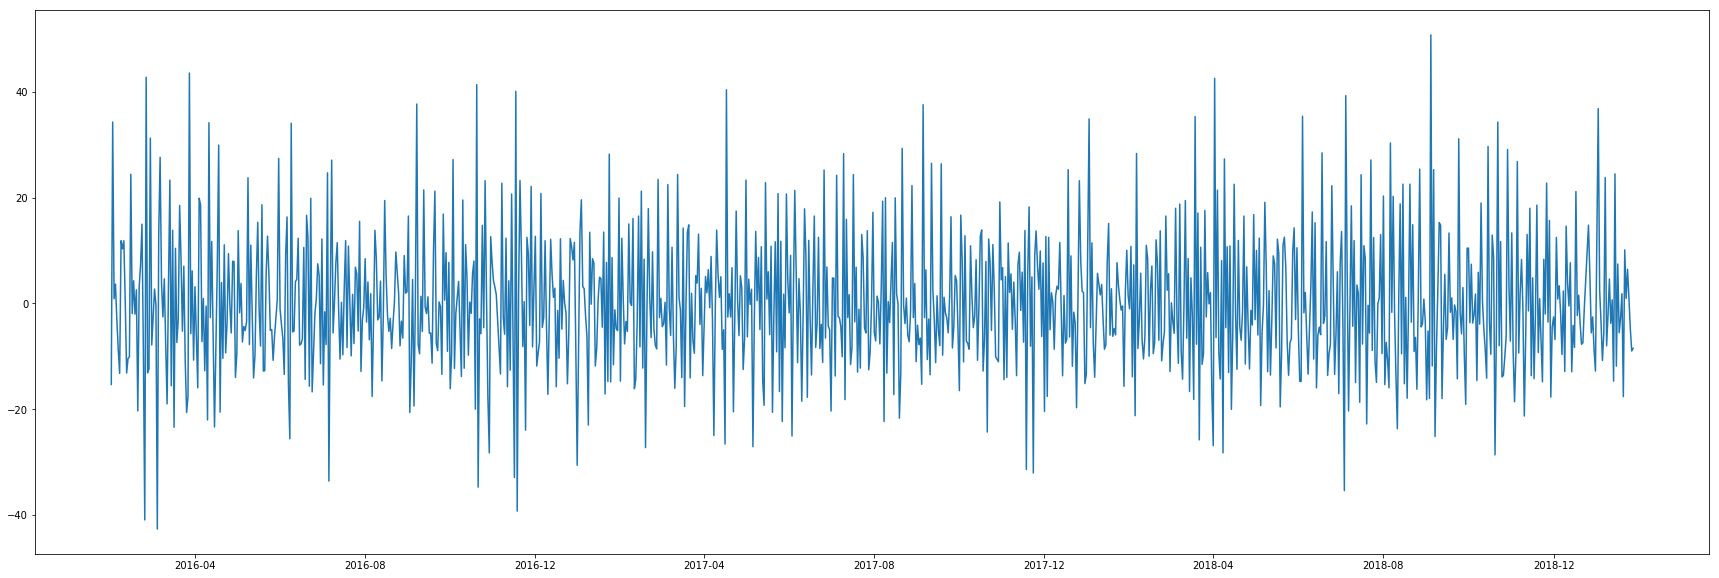

In [47]:
shift_data = data2-data2.shift()
shift_data.dropna(inplace=True)
plt.plot(shift_data)

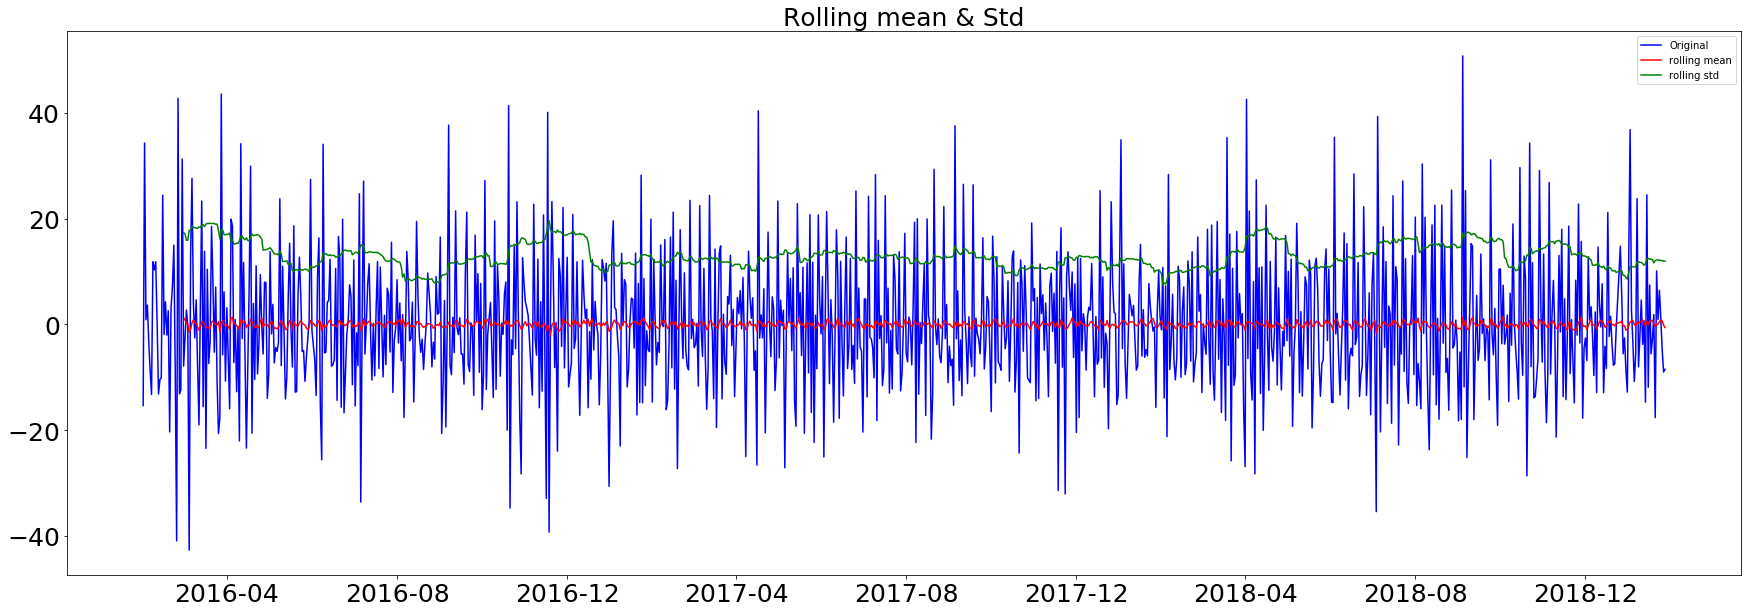

Results of Dickey-fuller test:
Test Statistic                -1.299796e+01
p-value                        2.724931e-24
#Lags Used                     1.900000e+01
Number of Observations Used    1.066000e+03
Critical Value (1%)           -3.436499e+00
Critical Value (5%)           -2.864255e+00
Critical Value (10%)          -2.568216e+00
dtype: float64


In [48]:
test_stationarity(shift_data)

Here we can see that after differencing (by 1) the moving average is stationary (almost a straight line.
Also, from dickey-fuller test we can see that the p-value is very small indicating the statistical significance of stationarity.

## Decomposing the orginal data into trend, seasonality and residuals

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [50]:
indexed_data.dropna(inplace=True)
#df = pd.DataFrame(data=indexed_data, index=pd.date_range(start=datetime(2016, 1, 2), periods=1116, freq='w'), columns=['salescount'])
decomposition = seasonal_decompose(indexed_data,freq=30)#, model='additive')

trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid



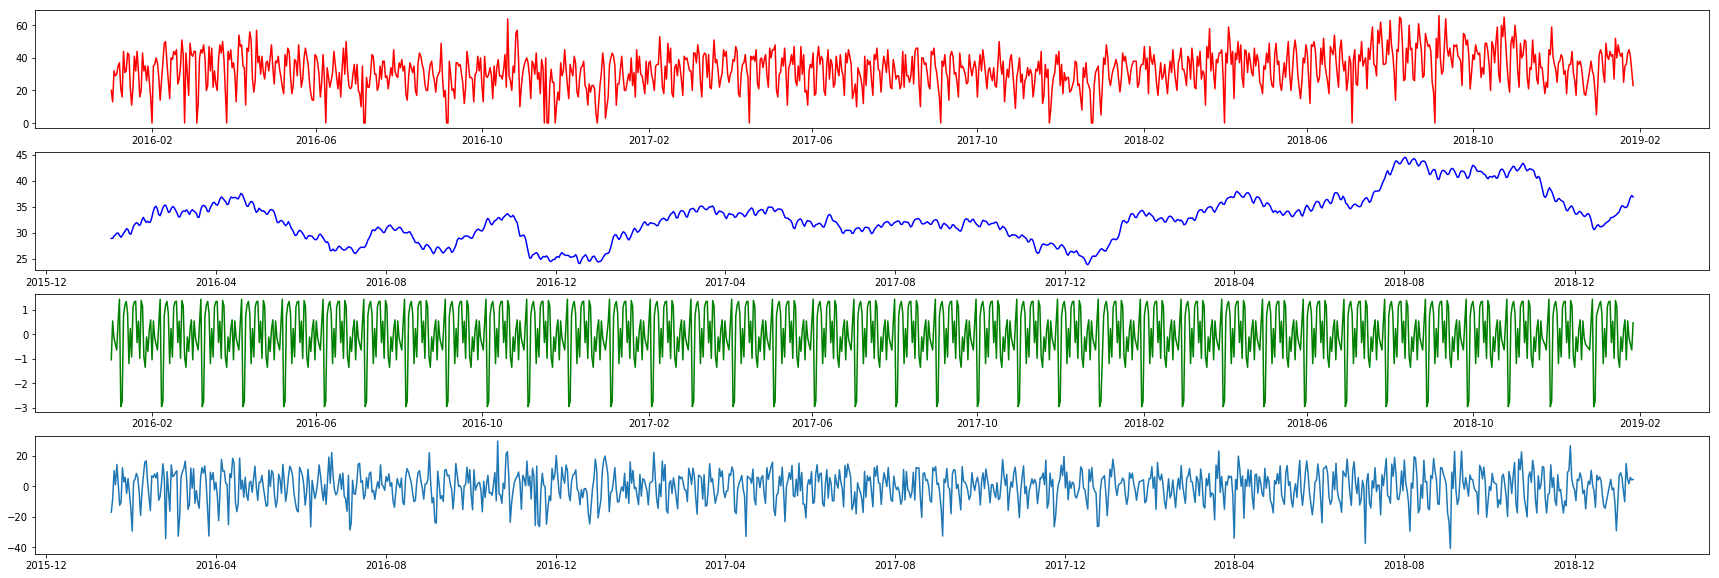

In [51]:
plt.subplot(411)
plt.plot(indexed_data,label='Original',color='red')
plt.subplot(412)
plt.plot(trend,label='trend',color='blue')
plt.subplot(413)
plt.plot(seasonality,label='seasonality',color='green')
plt.subplot(414)
plt.plot(residual,label='residual')


Here we can see that there is some seasonality present in the original data

## Checking if residuals are stationary or not

In [52]:
residual_data = residual

In [53]:
residual_data.dropna(inplace=True)

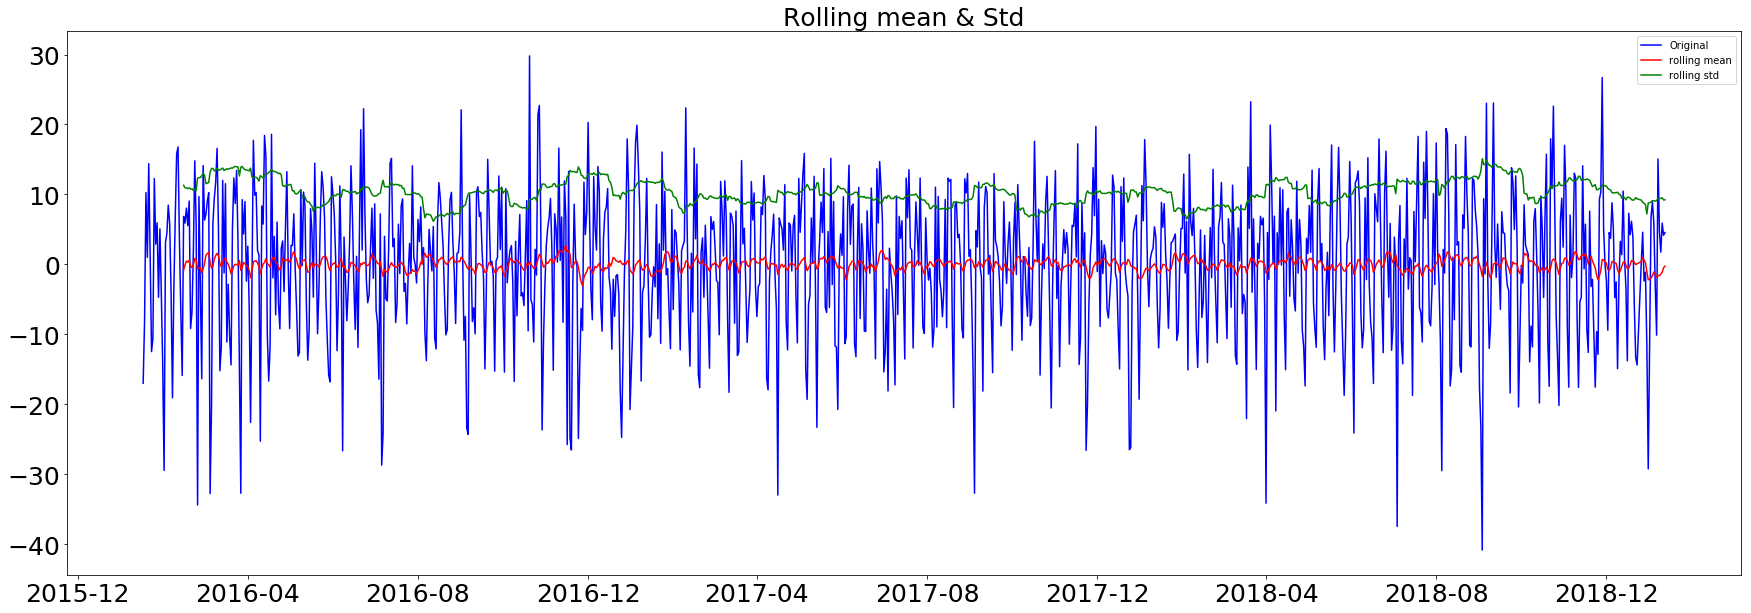

Results of Dickey-fuller test:
Test Statistic                -1.105510e+01
p-value                        4.967584e-20
#Lags Used                     2.200000e+01
Number of Observations Used    1.063000e+03
Critical Value (1%)           -3.436517e+00
Critical Value (5%)           -2.864263e+00
Critical Value (10%)          -2.568220e+00
dtype: float64


In [54]:
test_stationarity(residual_data)

## ACF and PACF 

In [55]:
from statsmodels.tsa.stattools import acf, pacf

In [56]:
lag_acf = acf(shift_data,nlags=20)
lag_pacf = pacf(shift_data,nlags=20,method='ols')

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 10 Text yticklabel objects>)

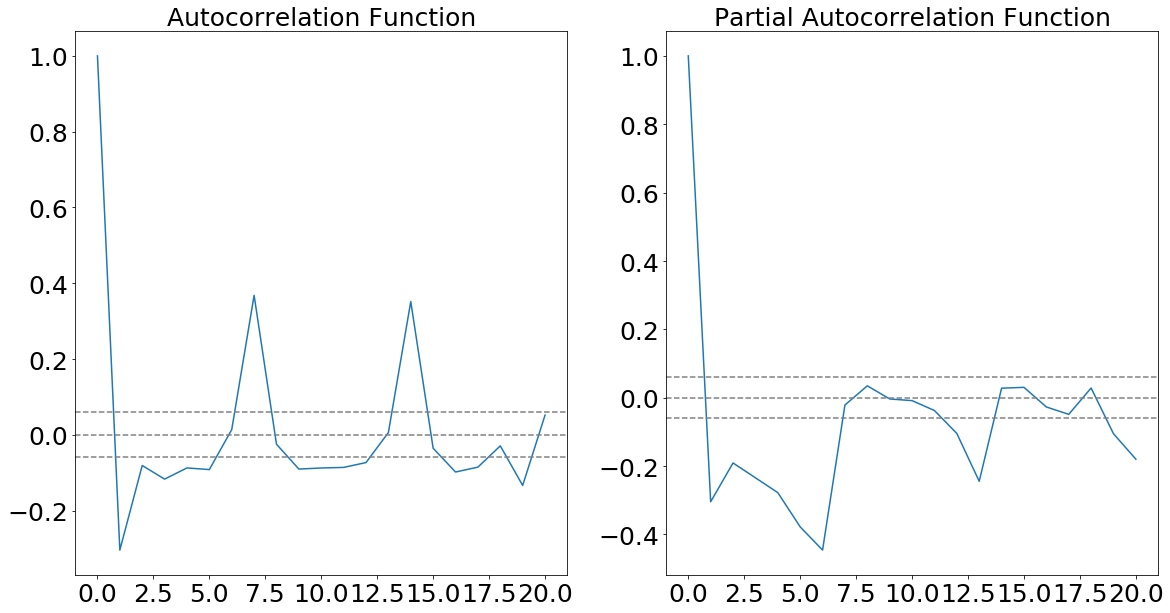

In [57]:
#plot ACF
plt.subplot(131)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift_data)),linestyle='--',color='gray')
plt.xticks(fontsize=25)
#plt.xlabel(fontsize=25)
plt.yticks(fontsize=25)
plt.title("Autocorrelation Function",fontsize=25)

#plot PACF
plt.subplot(132)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift_data)),linestyle='--',color='gray')
plt.title("Partial Autocorrelation Function",fontsize=25)
plt.xticks(fontsize=25)
#plt.xlabel(fontsize=25)
plt.yticks(fontsize=25)
#plt.tight_layout()

We can see that the p from PACF graph =7 and q from ACF graph =7.
From above, we can say that differencing =1

In [58]:
from statsmodels.tsa.arima_model import ARIMA


# ARIMA Model

In [59]:
import math


RSS:76927.9209
Plotting ARIMA model


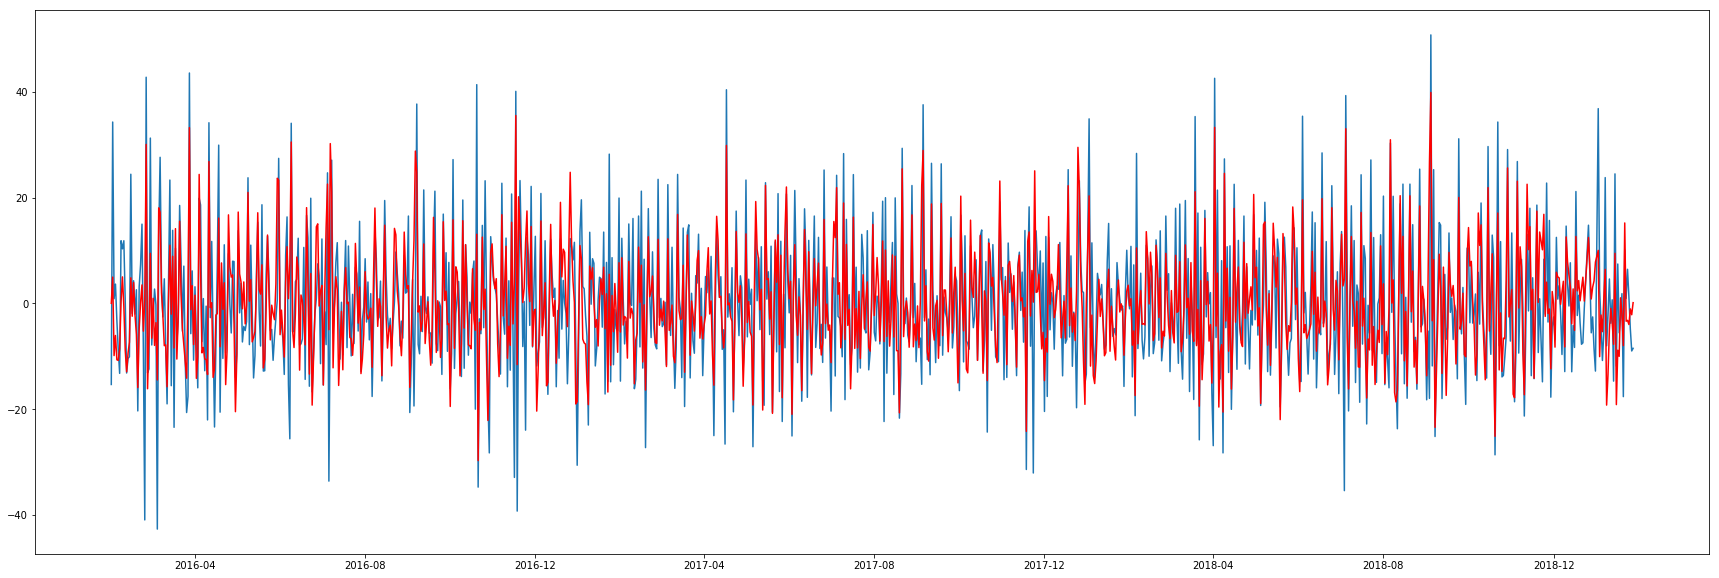

In [60]:
indexed_data.dropna(inplace=True)
shift_data.dropna(inplace=True)
model  =  ARIMA(indexed_data[29:], order = (7,1,7))
results_AR  =  model.fit(disp = -1)
plt.plot(shift_data)
plt.plot(results_AR.fittedvalues, color = 'red')

print('RSS:%.4f'%sum((results_AR.fittedvalues-(shift_data['salescount']))**2))
print('Plotting ARIMA model')

In [209]:
Out_ARIMA = pd.Series(results_AR.fittedvalues,copy=True)
print(Out_ARIMA.head())
#adding the moving average which was subtracted earlier to transform the data
untransformed = Out_ARIMA+rol_mean['salescount']
untransformed.fillna(0,inplace=True)
untransformed

date
2016-02-01     0.004749
2016-02-02     4.959451
2016-02-03    -9.873379
2016-02-04    -6.075617
2016-02-05   -10.663220
dtype: float64


date
2016-01-02     0.000000
2016-01-03     0.000000
2016-01-04     0.000000
2016-01-05     0.000000
2016-01-06     0.000000
2016-01-07     0.000000
2016-01-08     0.000000
2016-01-09     0.000000
2016-01-10     0.000000
2016-01-11     0.000000
2016-01-12     0.000000
2016-01-13     0.000000
2016-01-14     0.000000
2016-01-15     0.000000
2016-01-16     0.000000
2016-01-17     0.000000
2016-01-18     0.000000
2016-01-19     0.000000
2016-01-20     0.000000
2016-01-21     0.000000
2016-01-22     0.000000
2016-01-23     0.000000
2016-01-24     0.000000
2016-01-25     0.000000
2016-01-26     0.000000
2016-01-27     0.000000
2016-01-28     0.000000
2016-01-29     0.000000
2016-01-30     0.000000
2016-01-31     0.000000
                ...    
2018-12-28    34.292026
2018-12-29    36.095013
2018-12-30    35.941199
2018-12-31    38.302858
2019-01-02    40.708737
2019-01-03    21.027213
2019-01-04    29.458664
2019-01-05    26.114785
2019-01-06    32.033318
2019-01-07    37.688278
2019-01-08 

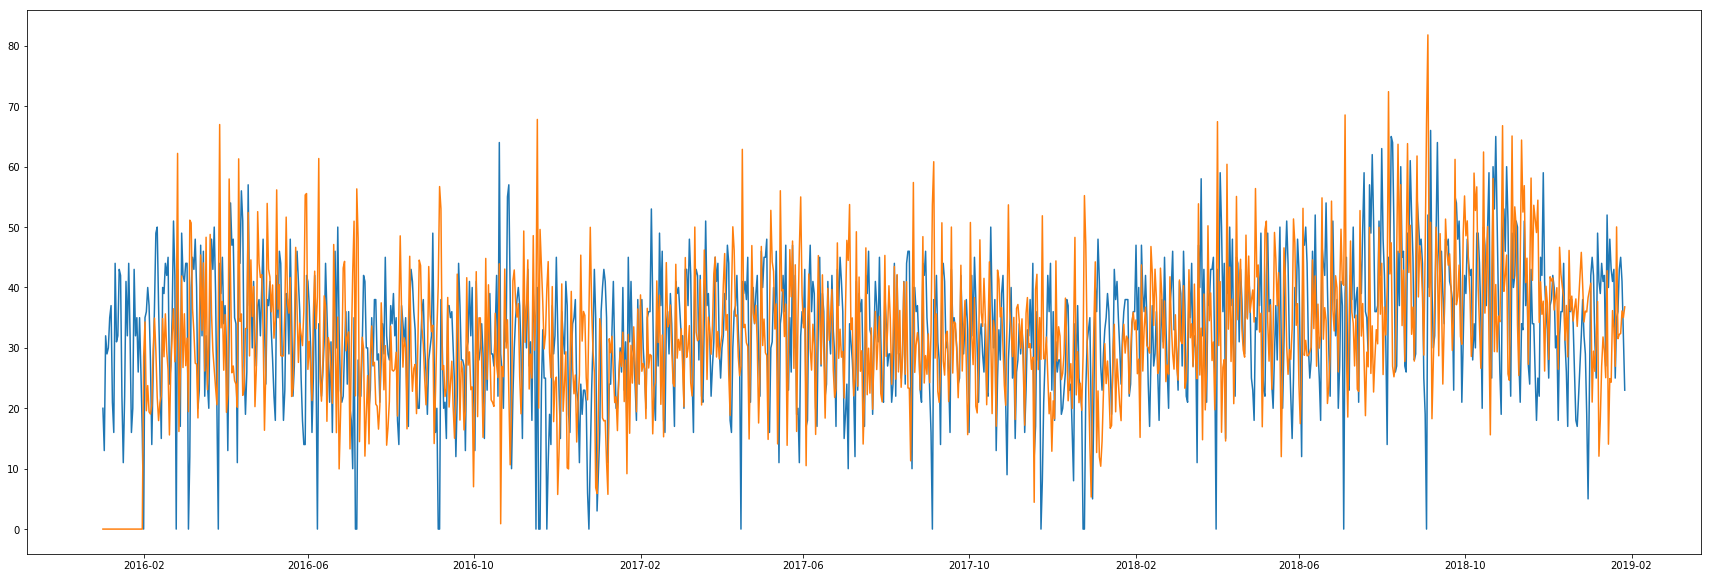

In [210]:
plt.plot(indexed_data)
plt.plot(untransformed)

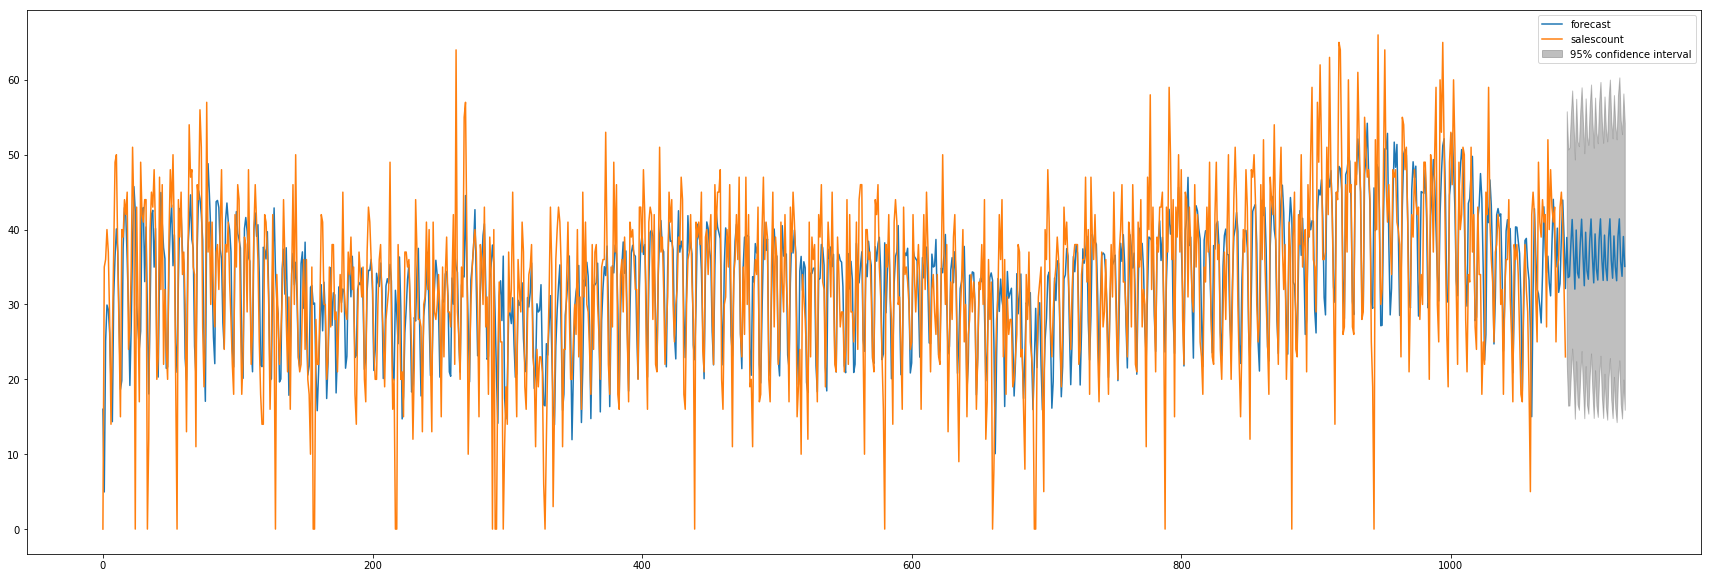

In [211]:
results_AR.plot_predict(1,1130)
final_predictions = results_AR.forecast(steps=14)

In [208]:
final_predictions

(array([38.94757084, 33.59430392, 33.73965269, 37.9076392 , 41.34609406,
        37.03488222, 32.05013751, 39.94371799, 34.21590871, 33.53692923,
        38.200707  , 41.38763321, 36.68796038, 32.50239023]),
 array([8.59634517, 8.72938911, 8.78885117, 8.78898193, 8.79285224,
        8.81951616, 8.83371311, 8.94142722, 8.95264839, 8.98274489,
        8.98277213, 8.98626818, 9.01071585, 9.02835031]),
 array([[22.09904391, 55.79609776],
        [16.48501566, 50.70359219],
        [16.51382093, 50.96548446],
        [20.68155116, 55.13372724],
        [24.11242034, 58.57976778],
        [19.74894819, 54.32081626],
        [14.73637798, 49.36389705],
        [22.41884267, 57.46859331],
        [16.6690403 , 51.76277712],
        [15.93107276, 51.14278571],
        [20.59479714, 55.80661686],
        [23.77487123, 59.0003952 ],
        [19.02728184, 54.34863893],
        [14.80714878, 50.19763169]]))

The final predictions are given above. The first array is the prediction. The third array show the lower and upper confidence bands. The second array shows the standard deviation.